In [118]:
#data pre processing using google drive clink link url


input_file = "FetchedUrlGoogleDrive.txt" 
output_file = "Formatted_urls.txt"

with open(input_file, "r") as f:
    urls = [line.strip() for line in f if line.strip()]  # Remove empty lines

# Format the URLs into a proper Python list
formatted_urls = ",\n".join(f'    "{url}"' for url in urls)

# Save to a file or print
with open(output_file, "w") as f:
    f.write(f"urls = [\n{formatted_urls}\n]")

print("✅ Formatted URLs saved to:", output_file)


✅ Formatted URLs saved to: Formatted_urls.txt


In [119]:
print("Reading the txt file")

f = open("Formatted_urls.txt", "r")

print(f.read())

Reading the txt file
urls = [
    "https://drive.google.com/open?id=1RgWzjr1k8rNAVF8U0LYe7YtBZegL_tu4&usp=drive_copy",
    "https://drive.google.com/open?id=1RnGrGY1uqi_sib8Zb_IB6645EARJcPmG&usp=drive_copy",
    "https://drive.google.com/open?id=1RrjuSE2byGXoUS9GoK-miHYIfxyL4QsF&usp=drive_copy",
    "https://drive.google.com/open?id=1RprvaiIU_uWU2J2m2Kei8DvuIQ1RO2he&usp=drive_copy",
    "https://drive.google.com/open?id=1Rd1z2tJqJxcih9-AADUEWx86Rewetuk2&usp=drive_copy",
    "https://drive.google.com/open?id=1RuXDb4OQUmLFcedUMxNiY4xhMfKyuIOH&usp=drive_copy"
]


In [120]:
import gdown
import re
import os
import requests

def extract_file_id(url):
    """Extracts the file ID from a Google Drive URL."""
    match = re.search(r'id=([a-zA-Z0-9_-]+)', url)
    return match.group(1) if match else None

def get_filename_from_headers(url):
    """Fetches the actual file name from the HTTP headers."""
    response = requests.get(url, stream=True, allow_redirects=True)
    if 'Content-Disposition' in response.headers:
        content_disp = response.headers['Content-Disposition']
        filename_match = re.search(r'filename\*?=(?:UTF-8\'\')?\"?([^\";]+)', content_disp)
        if filename_match:
            return filename_match.group(1)
    return None

def load_urls_from_file(file_path="formatted_urls.txt"):
    """Reads URLs from a text file and returns them as a clean list."""
    urls = []
    with open(file_path, "r") as f:
        for line in f:
            line = line.strip().strip('"')  # Remove spaces & quotes
            if line.startswith("http"):  # Ensure it's a valid URL
                urls.append(line.split("&")[0])  # Remove &usp=drive_copy part
    return urls

def download_files(urls, output_folder='Inputimg'):
    """Downloads files from Google Drive links and preserves original names."""
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for url in urls:
        file_id = extract_file_id(url)
        if file_id:
            gdrive_url = f'https://drive.google.com/uc?id={file_id}&export=download'
            
            # Try getting the correct filename from headers
            filename = get_filename_from_headers(gdrive_url)
            if not filename:
                filename = f"{file_id}.unknown"
                print(f"⚠️ Failed to retrieve name for file {file_id}. Using default name.")

            output_path = os.path.join(output_folder, filename)
            gdown.download(gdrive_url, output_path, quiet=False, use_cookies=True)
        else:
            print(f"❌ Invalid URL: {url}")

if __name__ == "__main__":
    urls = load_urls_from_file("Formatted_urls.txt")  # Load URLs dynamically
    print(f"✅ Loaded {len(urls)} URLs from file.")
    download_files(urls)


✅ Loaded 6 URLs from file.


Downloading...
From: https://drive.google.com/uc?id=1RgWzjr1k8rNAVF8U0LYe7YtBZegL_tu4&export=download
To: C:\Users\Sansk\OneDrive\Desktop\ML_Projects1\Write2DigitAi\Inputimg\9-6.jpg
100%|██████████████████████████████████████████████████████████████████████████████| 23.8k/23.8k [00:00<00:00, 411kB/s]
Downloading...
From: https://drive.google.com/uc?id=1RnGrGY1uqi_sib8Zb_IB6645EARJcPmG&export=download
To: C:\Users\Sansk\OneDrive\Desktop\ML_Projects1\Write2DigitAi\Inputimg\9-5.jpg
100%|██████████████████████████████████████████████████████████████████████████████| 22.2k/22.2k [00:00<00:00, 429kB/s]
Downloading...
From: https://drive.google.com/uc?id=1RrjuSE2byGXoUS9GoK-miHYIfxyL4QsF&export=download
To: C:\Users\Sansk\OneDrive\Desktop\ML_Projects1\Write2DigitAi\Inputimg\9-3.jpg
100%|██████████████████████████████████████████████████████████████████████████████| 24.9k/24.9k [00:00<00:00, 346kB/s]
Downloading...
From: https://drive.google.com/uc?id=1RprvaiIU_uWU2J2m2Kei8DvuIQ1RO2he&export=d

Enhanced image saved at: Outputimg\0_20022025-083002866_554781_YXXHSQEURF.png
Enhanced image saved at: Outputimg\1_20022025-083002866_224991_PGVREAHISU.png
Enhanced image saved at: Outputimg\2_20022025-083002886_923754_XWQHRIFLNH.png
Enhanced image saved at: Outputimg\3_20022025-083002894_540492_NSRWKVOIVP.png
Enhanced image saved at: Outputimg\4_20022025-083002902_338914_ZFCQLXZBYU.png
Enhanced image saved at: Outputimg\5_20022025-083002909_791387_LAZZEHTFFB.png


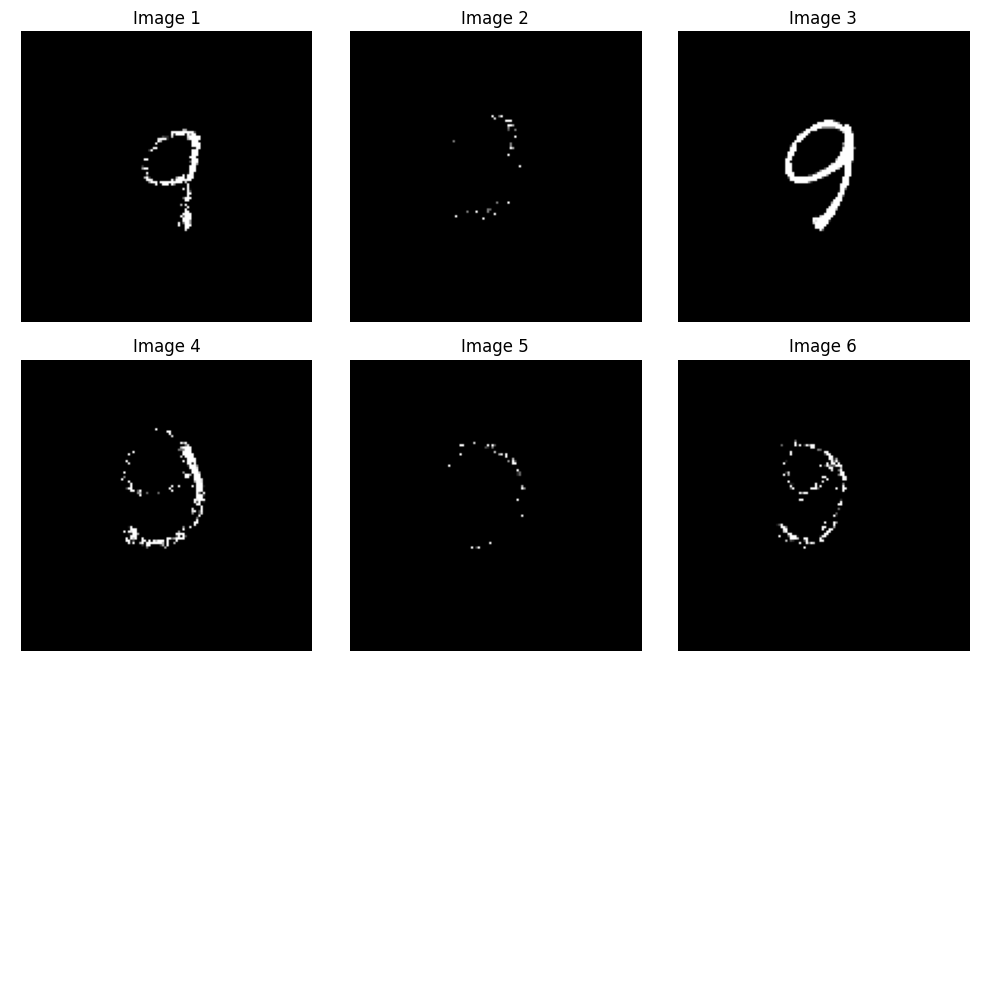

Processing complete. All enhanced images have been saved.


In [121]:
#channel alpha 1.5 & dialatin (5, 5)

import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import random
import string
from datetime import datetime

input_folder = 'Inputimg'
output_folder = 'Outputimg'

os.makedirs(output_folder, exist_ok=True)

image_counter = 0  # Folder numbering starting from 0
processed_images = []  # List to store processed images for grid display


def generate_random_name(folder_number):
    # Get current time in the format DDMMYYYY-HHMMSSMS
    timestamp = datetime.now().strftime("%d%m%Y-%H%M%S%f")[:-3]
    # Generate 6 random digits
    random_digits = ''.join(random.choices(string.digits, k=6))
    # Generate 10 random uppercase letters
    random_letters = ''.join(random.choices(string.ascii_uppercase, k=10))
    # Construct the final file name
    return f"{folder_number}_{timestamp}_{random_digits}_{random_letters}.png"


for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Error: Image not found or could not be loaded at path {image_path}")
            continue
        inverted_image = cv2.bitwise_not(image)

        # Applying thresholding to ensure the background is black
        _, thresholded_image = cv2.threshold(inverted_image, 200, 255, cv2.THRESH_BINARY)

        # Enhancing contrast and brightness
        alpha = 1.5  # Increase contrast
        beta = 0     # No extra brightness change
        enhanced_image = cv2.convertScaleAbs(thresholded_image, alpha=alpha, beta=beta)

        # Apply dilation to make the text bolder
        kernel = np.ones((5, 5), np.uint8)
        dilated_image = cv2.dilate(enhanced_image, kernel, iterations=1)

        # Resize to 128x128 pixels
        resized_image = cv2.resize(dilated_image, (128, 128))

        # Generate the unique image name
        output_filename = generate_random_name(image_counter)
        output_path = os.path.join(output_folder, output_filename)

        # Save the processed image
        cv2.imwrite(output_path, resized_image)
        print(f"Enhanced image saved at: {output_path}")

        # Add the resized image to the list for grid display
        processed_images.append(resized_image)

        # Increment the folder counter for naming
        image_counter += 1

# Display all images in a grid
if processed_images:
    num_images = len(processed_images)
    grid_size = int(np.ceil(np.sqrt(num_images)))  # Calculate grid dimensions

    fig, axs = plt.subplots(grid_size, grid_size, figsize=(10, 10))
    axs = axs.flatten()  # Flatten the grid to easily access each subplot

    for i, img in enumerate(processed_images):
        axs[i].imshow(img, cmap='gray')
        axs[i].axis('off')
        axs[i].set_title(f"Image {i + 1}")

    # Hide empty subplots
    for j in range(len(processed_images), len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No images to display.")

print("Processing complete. All enhanced images have been saved.")



In [122]:
# !pip install prettytable
# !pip install pillow
#!pip install prettytable

Enhanced image saved at: Outputimg\0_20022025-083003293_502374_MLFFWRISDX.png
Enhanced image saved at: Outputimg\1_20022025-083003304_183448_GZWZILLDQO.png
Enhanced image saved at: Outputimg\2_20022025-083003304_551227_VBGHCSGDUL.png
Enhanced image saved at: Outputimg\3_20022025-083003309_843185_OGUUZEWSED.png
Enhanced image saved at: Outputimg\4_20022025-083003309_673257_HNYGRUFTYF.png
Enhanced image saved at: Outputimg\5_20022025-083003309_002486_DRKIDFVWIH.png


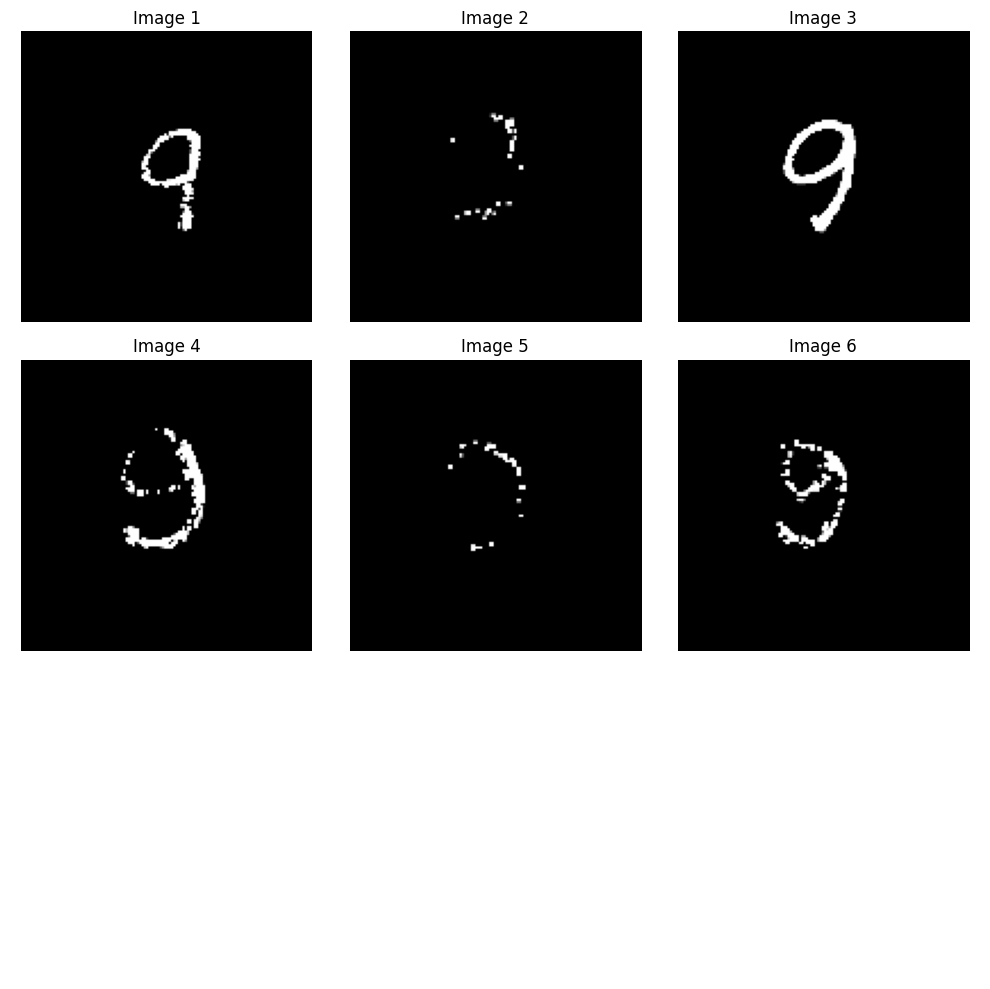

Processing complete. All enhanced images have been saved.


In [123]:
#channel alpha 1.5 & dialatin (10, 10)


import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import random
import string
from datetime import datetime

input_folder = 'Inputimg'
output_folder = 'Outputimg'

os.makedirs(output_folder, exist_ok=True)

image_counter = 0  # Folder numbering starting from 0
processed_images = []  # List to store processed images for grid display


def generate_random_name(folder_number):
    # Get current time in the format DDMMYYYY-HHMMSSMS
    timestamp = datetime.now().strftime("%d%m%Y-%H%M%S%f")[:-3]
    # Generate 6 random digits
    random_digits = ''.join(random.choices(string.digits, k=6))
    # Generate 10 random uppercase letters
    random_letters = ''.join(random.choices(string.ascii_uppercase, k=10))
    # Construct the final file name
    return f"{folder_number}_{timestamp}_{random_digits}_{random_letters}.png"


for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Error: Image not found or could not be loaded at path {image_path}")
            continue
        inverted_image = cv2.bitwise_not(image)

        # Applying thresholding to ensure the background is black
        _, thresholded_image = cv2.threshold(inverted_image, 200, 255, cv2.THRESH_BINARY)

        # Enhancing contrast and brightness
        alpha = 1.5  # Increase contrast
        beta = 0     # No extra brightness change
        enhanced_image = cv2.convertScaleAbs(thresholded_image, alpha=alpha, beta=beta)

        # Apply dilation to make the text bolder
        kernel = np.ones((10, 10), np.uint8)
        dilated_image = cv2.dilate(enhanced_image, kernel, iterations=1)

        # Resize to 128x128 pixels
        resized_image = cv2.resize(dilated_image, (128, 128))

        # Generate the unique image name
        output_filename = generate_random_name(image_counter)
        output_path = os.path.join(output_folder, output_filename)

        # Save the processed image
        cv2.imwrite(output_path, resized_image)
        print(f"Enhanced image saved at: {output_path}")

        # Add the resized image to the list for grid display
        processed_images.append(resized_image)

        # Increment the folder counter for naming
        image_counter += 1

# Display all images in a grid
if processed_images:
    num_images = len(processed_images)
    grid_size = int(np.ceil(np.sqrt(num_images)))  # Calculate grid dimensions

    fig, axs = plt.subplots(grid_size, grid_size, figsize=(10, 10))
    axs = axs.flatten()  # Flatten the grid to easily access each subplot

    for i, img in enumerate(processed_images):
        axs[i].imshow(img, cmap='gray')
        axs[i].axis('off')
        axs[i].set_title(f"Image {i + 1}")

    # Hide empty subplots
    for j in range(len(processed_images), len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No images to display.")

print("Processing complete. All enhanced images have been saved.")



Enhanced image saved at: Outputimg\0_20022025-083003688_432801_MYMEXVJGAU.png
Enhanced image saved at: Outputimg\1_20022025-083003688_922314_UZDUXBFOGK.png
Enhanced image saved at: Outputimg\2_20022025-083003688_346082_EPKVLRYSMP.png
Enhanced image saved at: Outputimg\3_20022025-083003702_855707_QHENCPSARA.png
Enhanced image saved at: Outputimg\4_20022025-083003705_383750_FCLCSIBGRR.png
Enhanced image saved at: Outputimg\5_20022025-083003707_149465_HKKXEKLCXL.png


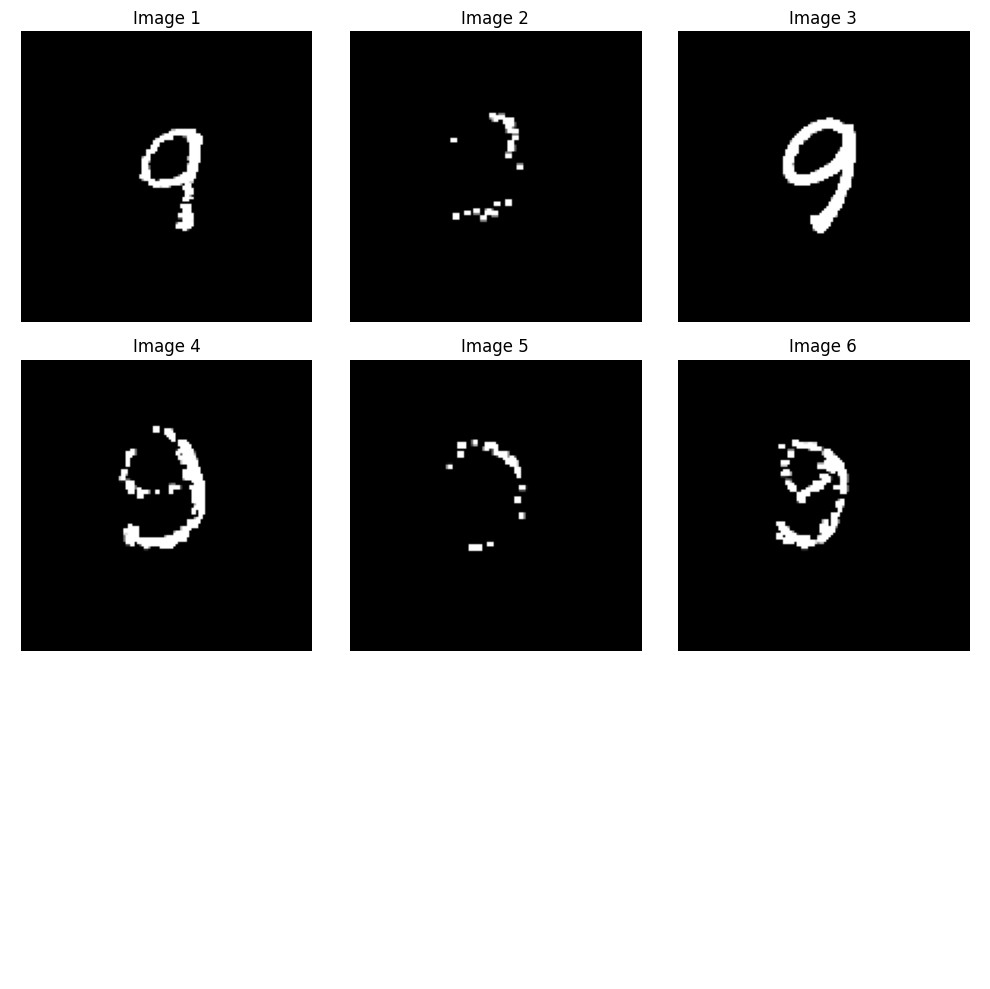

Processing complete. All enhanced images have been saved.


In [124]:
#channel alpha 1.5 & dialatin (15, 15)


import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import random
import string
from datetime import datetime

input_folder = 'Inputimg'
output_folder = 'Outputimg'

os.makedirs(output_folder, exist_ok=True)

image_counter = 0  # Folder numbering starting from 0
processed_images = []  # List to store processed images for grid display


def generate_random_name(folder_number):
    # Get current time in the format DDMMYYYY-HHMMSSMS
    timestamp = datetime.now().strftime("%d%m%Y-%H%M%S%f")[:-3]
    # Generate 6 random digits
    random_digits = ''.join(random.choices(string.digits, k=6))
    # Generate 10 random uppercase letters
    random_letters = ''.join(random.choices(string.ascii_uppercase, k=10))
    # Construct the final file name
    return f"{folder_number}_{timestamp}_{random_digits}_{random_letters}.png"


for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Error: Image not found or could not be loaded at path {image_path}")
            continue
        inverted_image = cv2.bitwise_not(image)

        # Applying thresholding to ensure the background is black
        _, thresholded_image = cv2.threshold(inverted_image, 200, 255, cv2.THRESH_BINARY)

        # Enhancing contrast and brightness
        alpha = 1.5  # Increase contrast
        beta = 0     # No extra brightness change
        enhanced_image = cv2.convertScaleAbs(thresholded_image, alpha=alpha, beta=beta)

        # Apply dilation to make the text bolder
        kernel = np.ones((15, 15), np.uint8)
        dilated_image = cv2.dilate(enhanced_image, kernel, iterations=1)

        # Resize to 128x128 pixels
        resized_image = cv2.resize(dilated_image, (128, 128))

        # Generate the unique image name
        output_filename = generate_random_name(image_counter)
        output_path = os.path.join(output_folder, output_filename)

        # Save the processed image
        cv2.imwrite(output_path, resized_image)
        print(f"Enhanced image saved at: {output_path}")

        # Add the resized image to the list for grid display
        processed_images.append(resized_image)

        # Increment the folder counter for naming
        image_counter += 1

# Display all images in a grid
if processed_images:
    num_images = len(processed_images)
    grid_size = int(np.ceil(np.sqrt(num_images)))  # Calculate grid dimensions

    fig, axs = plt.subplots(grid_size, grid_size, figsize=(10, 10))
    axs = axs.flatten()  # Flatten the grid to easily access each subplot

    for i, img in enumerate(processed_images):
        axs[i].imshow(img, cmap='gray')
        axs[i].axis('off')
        axs[i].set_title(f"Image {i + 1}")

    # Hide empty subplots
    for j in range(len(processed_images), len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No images to display.")

print("Processing complete. All enhanced images have been saved.")



Enhanced image saved at: Outputimg\0_20022025-083004090_502686_FRDOEPFKNA.png
Enhanced image saved at: Outputimg\1_20022025-083004094_594145_MRLEDMIRSA.png
Enhanced image saved at: Outputimg\2_20022025-083004096_149798_ZAMYPEKHNY.png
Enhanced image saved at: Outputimg\3_20022025-083004098_784252_DDYLFKNHKV.png
Enhanced image saved at: Outputimg\4_20022025-083004100_522268_SRSRAKPCSI.png
Enhanced image saved at: Outputimg\5_20022025-083004105_375482_YJCIHIGGZT.png


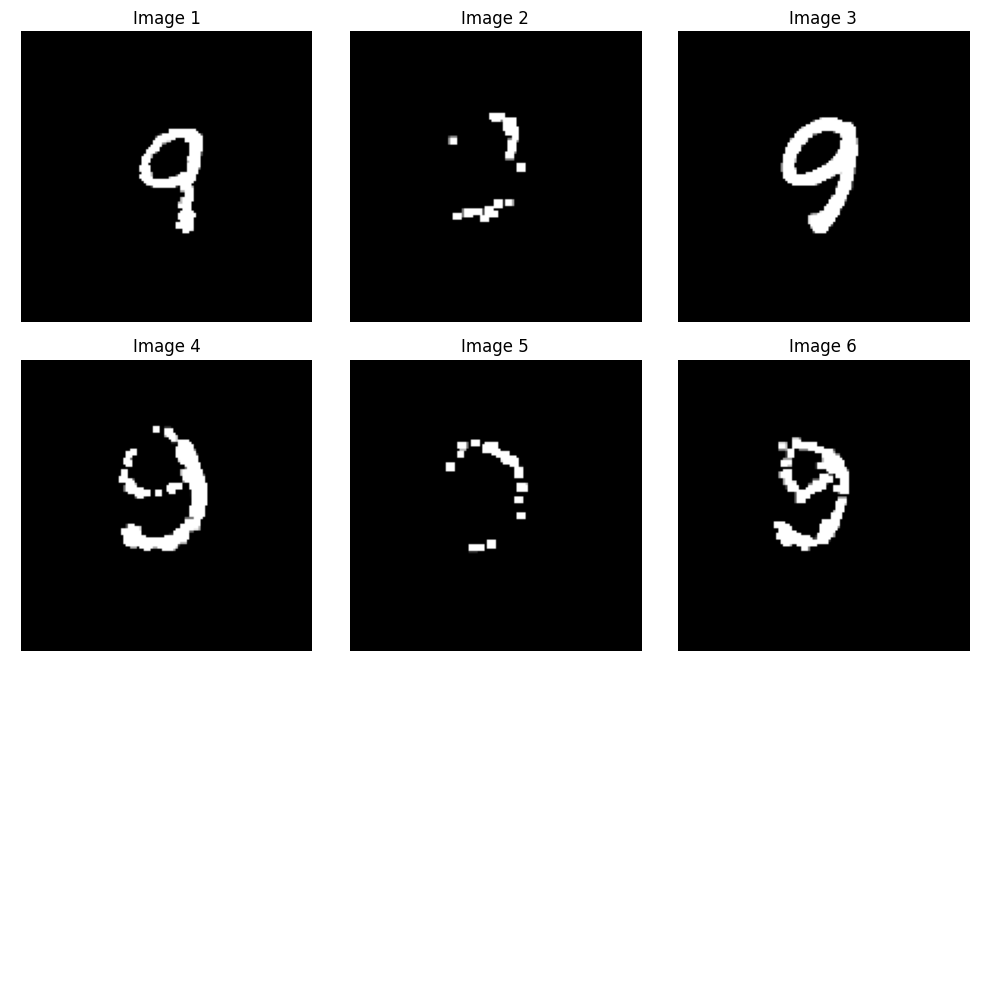

Processing complete. All enhanced images have been saved.


In [125]:
#channel alpha 1.5 & dialatin (20,20)

import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import random
import string
from datetime import datetime

input_folder = 'Inputimg'
output_folder = 'Outputimg'

os.makedirs(output_folder, exist_ok=True)

image_counter = 0  # Folder numbering starting from 0
processed_images = []  # List to store processed images for grid display


def generate_random_name(folder_number):
    # Get current time in the format DDMMYYYY-HHMMSSMS
    timestamp = datetime.now().strftime("%d%m%Y-%H%M%S%f")[:-3]
    # Generate 6 random digits
    random_digits = ''.join(random.choices(string.digits, k=6))
    # Generate 10 random uppercase letters
    random_letters = ''.join(random.choices(string.ascii_uppercase, k=10))
    # Construct the final file name
    return f"{folder_number}_{timestamp}_{random_digits}_{random_letters}.png"


for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Error: Image not found or could not be loaded at path {image_path}")
            continue
        inverted_image = cv2.bitwise_not(image)

        # Applying thresholding to ensure the background is black
        _, thresholded_image = cv2.threshold(inverted_image, 200, 255, cv2.THRESH_BINARY)

        # Enhancing contrast and brightness
        alpha = 1.5  # Increase contrast
        beta = 0     # No extra brightness change
        enhanced_image = cv2.convertScaleAbs(thresholded_image, alpha=alpha, beta=beta)

        # Apply dilation to make the text bolder
        kernel = np.ones((20, 20), np.uint8)
        dilated_image = cv2.dilate(enhanced_image, kernel, iterations=1)

        # Resize to 128x128 pixels
        resized_image = cv2.resize(dilated_image, (128, 128))

        # Generate the unique image name
        output_filename = generate_random_name(image_counter)
        output_path = os.path.join(output_folder, output_filename)

        # Save the processed image
        cv2.imwrite(output_path, resized_image)
        print(f"Enhanced image saved at: {output_path}")

        # Add the resized image to the list for grid display
        processed_images.append(resized_image)

        # Increment the folder counter for naming
        image_counter += 1

# Display all images in a grid
if processed_images:
    num_images = len(processed_images)
    grid_size = int(np.ceil(np.sqrt(num_images)))  # Calculate grid dimensions

    fig, axs = plt.subplots(grid_size, grid_size, figsize=(10, 10))
    axs = axs.flatten()  # Flatten the grid to easily access each subplot

    for i, img in enumerate(processed_images):
        axs[i].imshow(img, cmap='gray')
        axs[i].axis('off')
        axs[i].set_title(f"Image {i + 1}")

    # Hide empty subplots
    for j in range(len(processed_images), len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No images to display.")

print("Processing complete. All enhanced images have been saved.")

Enhanced image saved at: Outputimg\0_20022025-083004554_062389_RZMMKVIMPL.png
Enhanced image saved at: Outputimg\1_20022025-083004556_603843_QEHDAXFMZT.png
Enhanced image saved at: Outputimg\2_20022025-083004556_403024_KCGPHNPMOE.png
Enhanced image saved at: Outputimg\3_20022025-083004556_871695_AMGXQRPQPC.png
Enhanced image saved at: Outputimg\4_20022025-083004556_956715_CJGASLEVQI.png
Enhanced image saved at: Outputimg\5_20022025-083004568_303374_JGCHWANHKR.png


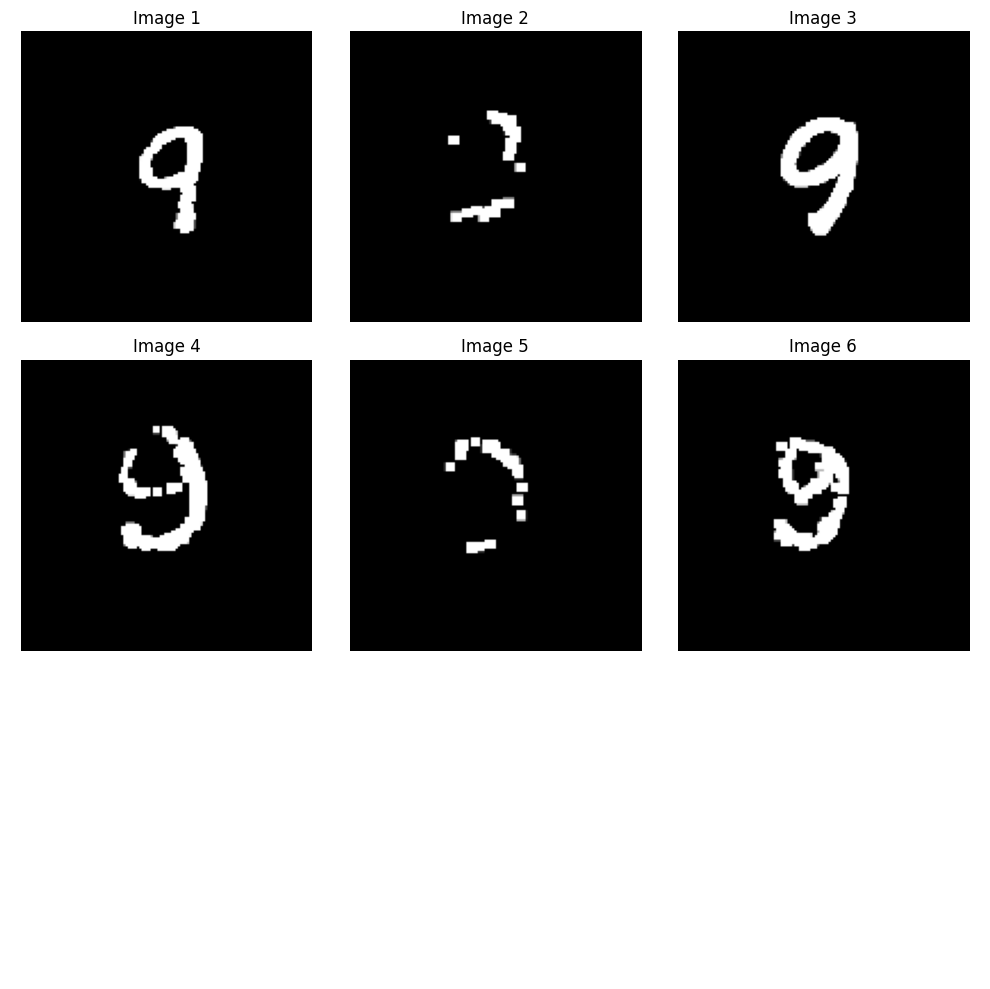

Processing complete. All enhanced images have been saved.


In [126]:
#channel alpha 1.5 & dialatin (25, 25)


import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import random
import string
from datetime import datetime

input_folder = 'Inputimg'
output_folder = 'Outputimg'

os.makedirs(output_folder, exist_ok=True)

image_counter = 0  # Folder numbering starting from 0
processed_images = []  # List to store processed images for grid display


def generate_random_name(folder_number):
    # Get current time in the format DDMMYYYY-HHMMSSMS
    timestamp = datetime.now().strftime("%d%m%Y-%H%M%S%f")[:-3]
    # Generate 6 random digits
    random_digits = ''.join(random.choices(string.digits, k=6))
    # Generate 10 random uppercase letters
    random_letters = ''.join(random.choices(string.ascii_uppercase, k=10))
    # Construct the final file name
    return f"{folder_number}_{timestamp}_{random_digits}_{random_letters}.png"


for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Error: Image not found or could not be loaded at path {image_path}")
            continue
        inverted_image = cv2.bitwise_not(image)

        # Applying thresholding to ensure the background is black
        _, thresholded_image = cv2.threshold(inverted_image, 200, 255, cv2.THRESH_BINARY)

        # Enhancing contrast and brightness
        alpha = 1.5  # Increase contrast
        beta = 0     # No extra brightness change
        enhanced_image = cv2.convertScaleAbs(thresholded_image, alpha=alpha, beta=beta)

        # Apply dilation to make the text bolder
        kernel = np.ones((25, 25), np.uint8)
        dilated_image = cv2.dilate(enhanced_image, kernel, iterations=1)

        # Resize to 128x128 pixels
        resized_image = cv2.resize(dilated_image, (128, 128))

        # Generate the unique image name
        output_filename = generate_random_name(image_counter)
        output_path = os.path.join(output_folder, output_filename)

        # Save the processed image
        cv2.imwrite(output_path, resized_image)
        print(f"Enhanced image saved at: {output_path}")

        # Add the resized image to the list for grid display
        processed_images.append(resized_image)

        # Increment the folder counter for naming
        image_counter += 1

# Display all images in a grid
if processed_images:
    num_images = len(processed_images)
    grid_size = int(np.ceil(np.sqrt(num_images)))  # Calculate grid dimensions

    fig, axs = plt.subplots(grid_size, grid_size, figsize=(10, 10))
    axs = axs.flatten()  # Flatten the grid to easily access each subplot

    for i, img in enumerate(processed_images):
        axs[i].imshow(img, cmap='gray')
        axs[i].axis('off')
        axs[i].set_title(f"Image {i + 1}")

    # Hide empty subplots
    for j in range(len(processed_images), len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No images to display.")

print("Processing complete. All enhanced images have been saved.")



Enhanced image saved at: Outputimg\0_20022025-083004956_729863_STIFIYYWFA.png
Enhanced image saved at: Outputimg\1_20022025-083004956_298051_RZDEUIZLFO.png
Enhanced image saved at: Outputimg\2_20022025-083005008_537657_CJQWRHTCGS.png
Enhanced image saved at: Outputimg\3_20022025-083005011_344796_HWGYTGQEEP.png
Enhanced image saved at: Outputimg\4_20022025-083005481_643558_EETXNIQICQ.png
Enhanced image saved at: Outputimg\5_20022025-083005488_093597_WUNVQLPNXG.png


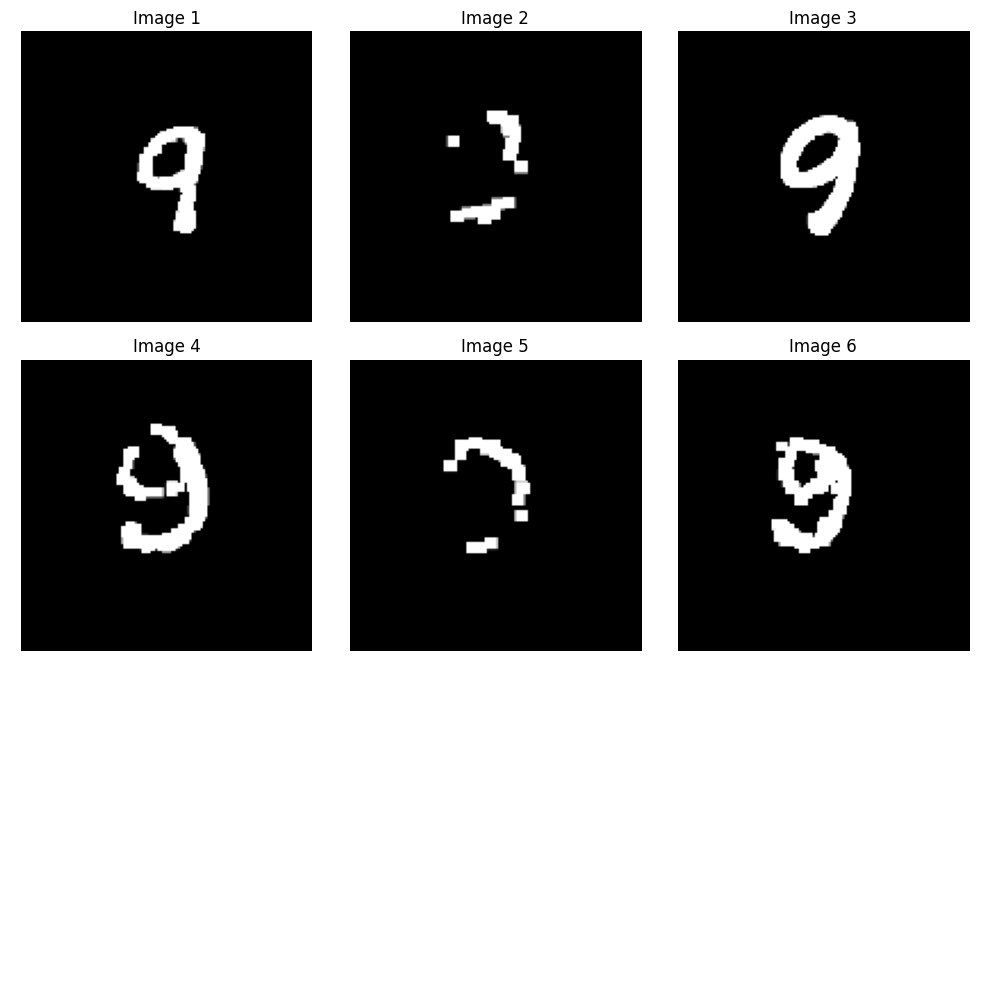

Processing complete. All enhanced images have been saved.


In [127]:
#channel alpha 1.5 & dialatin (30, 30)


import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import random
import string
from datetime import datetime

input_folder = 'Inputimg'
output_folder = 'Outputimg'

os.makedirs(output_folder, exist_ok=True)

image_counter = 0  # Folder numbering starting from 0
processed_images = []  # List to store processed images for grid display


def generate_random_name(folder_number):
    # Get current time in the format DDMMYYYY-HHMMSSMS
    timestamp = datetime.now().strftime("%d%m%Y-%H%M%S%f")[:-3]
    # Generate 6 random digits
    random_digits = ''.join(random.choices(string.digits, k=6))
    # Generate 10 random uppercase letters
    random_letters = ''.join(random.choices(string.ascii_uppercase, k=10))
    # Construct the final file name
    return f"{folder_number}_{timestamp}_{random_digits}_{random_letters}.png"


for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Error: Image not found or could not be loaded at path {image_path}")
            continue
        inverted_image = cv2.bitwise_not(image)

        # Applying thresholding to ensure the background is black
        _, thresholded_image = cv2.threshold(inverted_image, 200, 255, cv2.THRESH_BINARY)

        # Enhancing contrast and brightness
        alpha = 1.5  # Increase contrast
        beta = 0     # No extra brightness change
        enhanced_image = cv2.convertScaleAbs(thresholded_image, alpha=alpha, beta=beta)

        # Apply dilation to make the text bolder
        kernel = np.ones((30, 30), np.uint8)
        dilated_image = cv2.dilate(enhanced_image, kernel, iterations=1)

        # Resize to 128x128 pixels
        resized_image = cv2.resize(dilated_image, (128, 128))

        # Generate the unique image name
        output_filename = generate_random_name(image_counter)
        output_path = os.path.join(output_folder, output_filename)

        # Save the processed image
        cv2.imwrite(output_path, resized_image)
        print(f"Enhanced image saved at: {output_path}")

        # Add the resized image to the list for grid display
        processed_images.append(resized_image)

        # Increment the folder counter for naming
        image_counter += 1

# Display all images in a grid
if processed_images:
    num_images = len(processed_images)
    grid_size = int(np.ceil(np.sqrt(num_images)))  # Calculate grid dimensions

    fig, axs = plt.subplots(grid_size, grid_size, figsize=(10, 10))
    axs = axs.flatten()  # Flatten the grid to easily access each subplot

    for i, img in enumerate(processed_images):
        axs[i].imshow(img, cmap='gray')
        axs[i].axis('off')
        axs[i].set_title(f"Image {i + 1}")

    # Hide empty subplots
    for j in range(len(processed_images), len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No images to display.")

print("Processing complete. All enhanced images have been saved.")



In [128]:
import os
import shutil

def delete_folder_contents(folder_name="Inputimg"):
    """Deletes all files and subfolders inside the specified folder."""
    if not os.path.exists(folder_name):
        print(f"❌ Folder '{folder_name}' does not exist.")
        return

    for item in os.listdir(folder_name):
        item_path = os.path.join(folder_name, item)
        
        try:
            if os.path.isfile(item_path) or os.path.islink(item_path):
                os.remove(item_path)  # Delete file or symbolic link
                print(f"🗑️ Deleted file: {item}")
            elif os.path.isdir(item_path):
                shutil.rmtree(item_path)  # Delete folder
                print(f"📂 Deleted folder: {item}")
        except Exception as e:
            print(f"⚠️ Error deleting {item}: {e}")

    print(f"✅ All contents of '{folder_name}' have been deleted.")

if __name__ == "__main__":
    delete_folder_contents()


🗑️ Deleted file: 9-1.jpg
🗑️ Deleted file: 9-2.jpg
🗑️ Deleted file: 9-3.jpg
🗑️ Deleted file: 9-4.jpg
🗑️ Deleted file: 9-5.jpg
🗑️ Deleted file: 9-6.jpg
✅ All contents of 'Inputimg' have been deleted.


In [130]:
import os
import time
from prettytable import PrettyTable
from PIL import Image

# Set up the table
table = PrettyTable()
table.field_names = ["File Name", "Folder Name", "Size (KB)", "Dimensions (WxH)", "Creation Time"]
total_images = 0
total_size = 0
total_width = 0
total_height = 0

folders = input("Enter folder names separated by commas: ").split(',')
for folder_name in folders:
    folder_name = folder_name.strip()
    if not os.path.exists(folder_name):
        print(f"Folder '{folder_name}' does not exist. Skipping...")
        continue
    png_files = [f for f in os.listdir(folder_name) if f.lower().endswith('.png')]
    for file_name in png_files:
        file_path = os.path.join(folder_name, file_name)
        creation_time = time.ctime(os.path.getctime(file_path))
        file_size = os.path.getsize(file_path) / 1024
        with Image.open(file_path) as img:
            width, height = img.size
        table.add_row([file_name, folder_name, f"{file_size:.2f} KB", f"{width}x{height}", creation_time])
        
        # Accumulate for mean calculation
        total_images += 1
        total_size += file_size
        total_width += width
        total_height += height

# Display table
if total_images > 0:
    # Calculate the mean width and height
    mean_width = total_width / total_images
    mean_height = total_height / total_images

    print("\nSummary:")
    print(f"Total Images: {total_images}")
    print(f"Total Size: {total_size:.2f} KB")
    print(f"Mean Width: {mean_width:.2f}")
    print(f"Mean Height: {mean_height:.2f}")
    print("\n")
    print(table)
    
else:
    print("No .png images found in the provided folders.")

Enter folder names separated by commas:  0,1,2,3,4,5,6,7,8,9



Summary:
Total Images: 775
Total Size: 567.74 KB
Mean Width: 128.00
Mean Height: 128.00


+--------------------------------------------+-------------+-----------+------------------+--------------------------+
|                 File Name                  | Folder Name | Size (KB) | Dimensions (WxH) |      Creation Time       |
+--------------------------------------------+-------------+-----------+------------------+--------------------------+
| 0_20022025-072708764_073021_ZHWJFBBOWY.png |      0      |  0.86 KB  |     128x128      | Thu Feb 20 07:27:08 2025 |
| 0_20022025-072709523_546123_KFKKLXUOMZ.png |      0      |  0.86 KB  |     128x128      | Thu Feb 20 07:27:09 2025 |
| 0_20022025-072710149_885628_OUTLKCGDXM.png |      0      |  0.74 KB  |     128x128      | Thu Feb 20 07:27:10 2025 |
| 0_20022025-072712614_604541_JBJYKHYNLY.png |      0      |  0.75 KB  |     128x128      | Thu Feb 20 07:27:12 2025 |
| 0_20022025-072713187_997232_BZVUBKEOBD.png |      0      |  0.73 KB  |    